{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
        55.5, 56.5]),
 [Text(0, 0.5, 'word_freq_make'),
  Text(0, 1.5, 'word_freq_address'),
  Text(0, 2.5, 'word_freq_all'),
  Text(0, 3.5, 'word_freq_3d'),
  Text(0, 4.5, 'word_freq_our'),
  Text(0, 5.5, 'word_freq_over'),
  Text(0, 6.5, 'word_freq_remove'),
  Text(0, 7.5, 'word_freq_internet'),
  Text(0, 8.5, 'word_freq_order'),
  Text(0, 9.5, 'word_freq_mail'),
  Text(0, 10.5, 'word_freq_receive'),
  Text(0, 11.5, 'word_freq_will'),
  Text(0, 12.5, 'word_freq_people'),
  Text(0, 13.5, 'word_freq_report'),
  Text(0, 14.5, 'word_freq_addresses'),
  Text(0, 15.5, 'word_freq_free'),
  Text(0, 16.5, 'word_freq_business'),
 

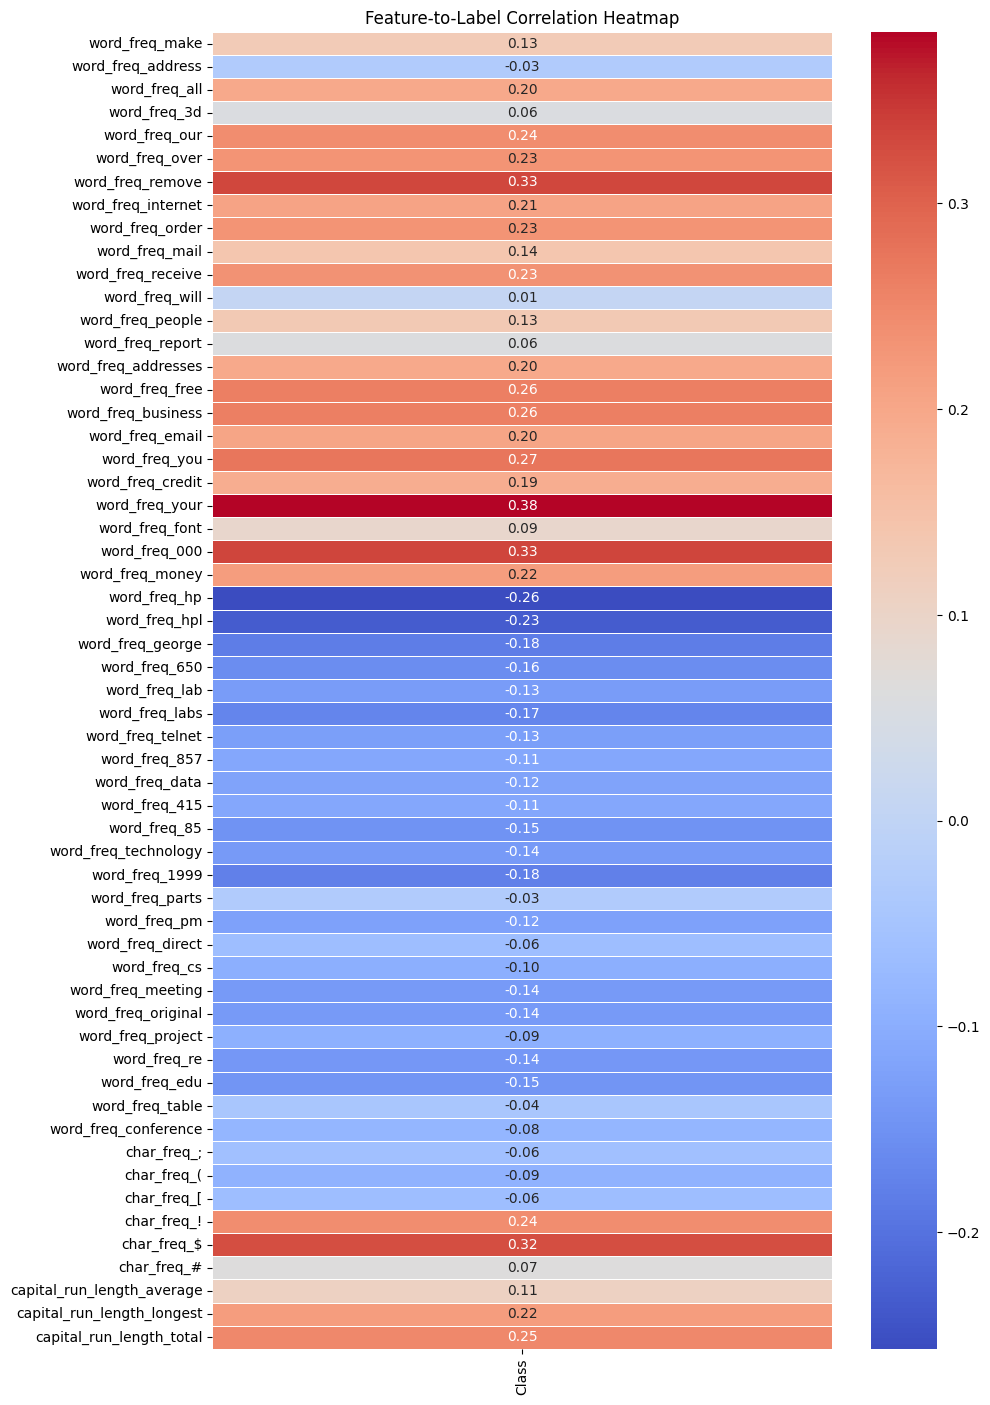

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from ucimlrepo import fetch_ucirepo

spambase = fetch_ucirepo(id=94)
X = spambase.data.features
y = spambase.data.targets
print(spambase.metadata)
print(spambase.variables)

missing_values = X.isnull().sum()
total_missing = missing_values.sum()

print("Missing Values Per Column:\n", missing_values)
print(f"\nTotal Missing Values: {total_missing}\n")

panda_data = pd.concat([X, y], axis=1)
correlation_matrix = panda_data.corr().loc[X.columns, y.columns]
sorted_corr  = correlation_matrix.unstack().sort_values(ascending=False)
print(sorted_corr)

plt.figure(figsize=(10, len(correlation_matrix) * 0.3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature-to-Label Correlation Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)


In [70]:
# Split into training (60%) and temp (40%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y.values.ravel(), test_size=0.4, random_state=42, stratify=y)

# Split temp set into validation (20%) and testing (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training Set: {X_train.shape}, Validation Set: {X_val.shape}, Test Set: {X_test.shape}")

Training Set: (2760, 57), Validation Set: (920, 57), Test Set: (921, 57)


In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [73]:
param_grid = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}  # C is the inverse of regularization strength

# Define K-Fold (to maintain class balance)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression model
log_reg = LogisticRegression(penalty='l2', solver='saga', max_iter=5000)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(log_reg, param_grid, cv=kfold, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print(f"\nBest Parameters from Grid Search: {best_params}")


Best Parameters from Grid Search: {'C': 10}


In [74]:
# Train the best Logistic Regression model
best_model = LogisticRegression(penalty='l2', solver='saga', C=best_params['C'], max_iter=5000)
best_model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=5000, solver='saga')


Validation Set Performance:
Validation Accuracy: 0.92
Validation F1 Score: 0.90
Validation Precision: 0.93
Validation Recall: 0.87

Validation Confusion Matrix:


Text(0.5, 1.0, 'Confusion Matrix')

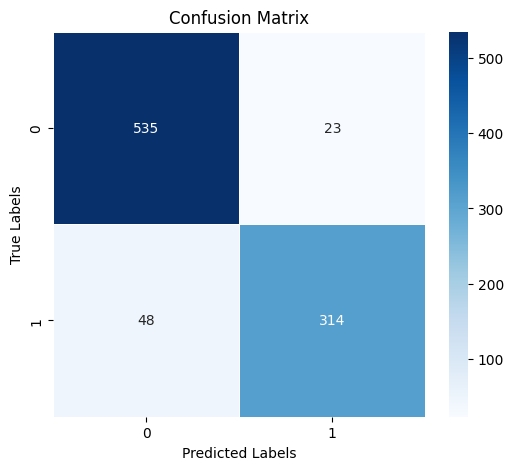

In [75]:
# Predict on validation set
y_val_pred = best_model.predict(X_val)

# Compute evaluation metrics for validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)

print("\nValidation Set Performance:")
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Validation F1 Score: {val_f1:.2f}")
print(f"Validation Precision: {val_precision:.2f}")
print(f"Validation Recall: {val_recall:.2f}")

# Confusion Matrix
print("\nValidation Confusion Matrix:")
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, cmap="Blues", fmt="d", linewidths=0.5)

# Labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")


Final Test Set Performance:
Test Accuracy: 0.92
Test F1 Score: 0.90
Test Precision: 0.91
Test Recall: 0.88

Test Confusion Matrix:


Text(0.5, 1.0, 'Confusion Matrix')

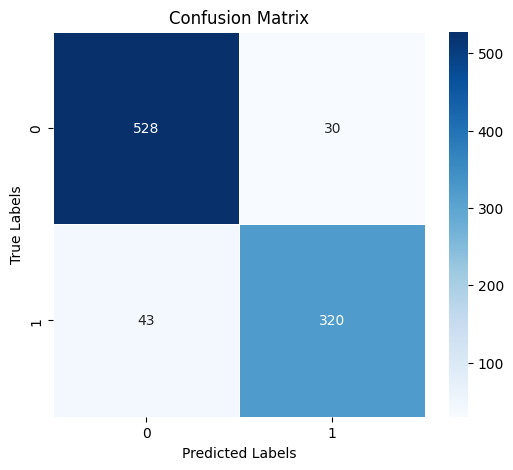

In [76]:
# Predict on test set
y_test_pred = best_model.predict(X_test)

# Compute evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

print("\nFinal Test Set Performance:")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test F1 Score: {test_f1:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")

# Confusion Matrix
print("\nTest Confusion Matrix:")
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap="Blues", fmt="d", linewidths=0.5)

# Labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

Text(0.5, 1.0, 'Confusion Matrix')

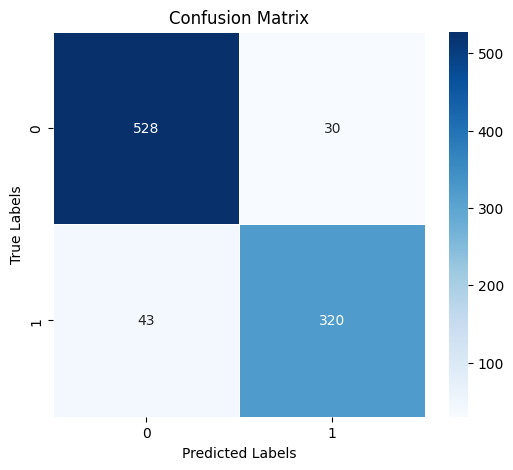

In [77]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap="Blues", fmt="d", linewidths=0.5)

# Labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

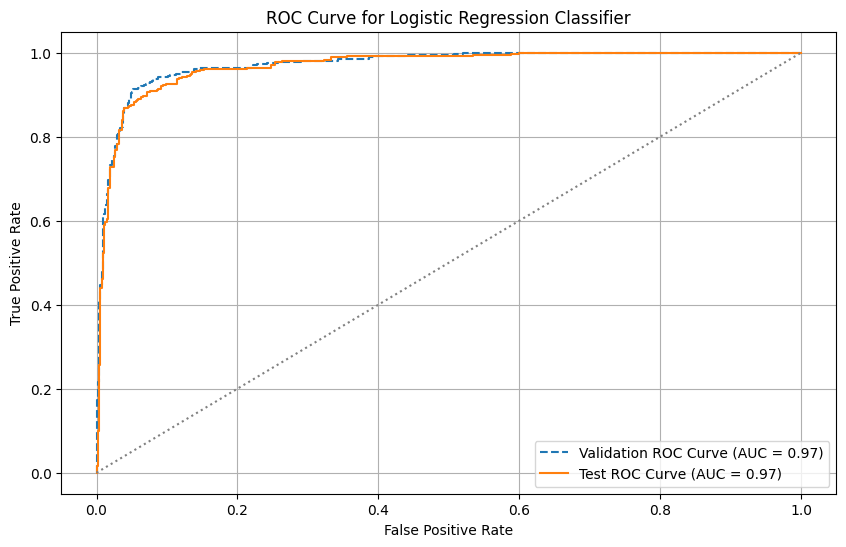

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_val_scores = best_model.decision_function(X_val)
y_test_scores = best_model.decision_function(X_test)

# Compute ROC curve & AUC for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_scores)
auc_val = auc(fpr_val, tpr_val)

# Compute ROC curve & AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_scores)
auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(10, 6))
plt.plot(fpr_val, tpr_val, label=f'Validation ROC Curve (AUC = {auc_val:.2f})', linestyle='--')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {auc_test:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='dotted')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Classifier')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

In [78]:
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

accuracy_val = accuracy_score(y_val, y_val_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

error_val = 1 - accuracy_val
error_test = 1 - accuracy_test

print(f'Validation Accuracy: {accuracy_val:.4f}, Prediction Error: {error_val:.4f}')
print(f'Test Accuracy: {accuracy_test:.4f}, Prediction Error: {error_test:.4f}')

Validation Accuracy: 0.9228, Prediction Error: 0.0772
Test Accuracy: 0.9207, Prediction Error: 0.0793
